In [1]:
%matplotlib inline

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_circles

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC, LinearSVR, SVC, OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

# Support Vector Machines

## Live Demo

In [6]:
ds = load_iris()
attrs, tgt = ds['data'], ds['target']

In [23]:
simple_svm = LinearSVC(C=1e-2)

In [24]:
simple_svm.fit(attrs, tgt)

LinearSVC(C=0.01)

In [25]:
simple_svm.coef_

array([[ 0.07905575,  0.28624194, -0.43700036, -0.19187972],
       [ 0.01499289, -0.25530531,  0.11715578, -0.10162956],
       [-0.24018788, -0.18099479,  0.34400786,  0.30562128]])

In [26]:
simple_svm.score(attrs, tgt)

0.8133333333333334

In [20]:
simple_log = LogisticRegression(C=1e-2)

In [21]:
simple_log.fit(attrs, tgt)

LogisticRegression(C=0.01)

In [22]:
simple_log.score(attrs, tgt)

0.8733333333333333

In [28]:
# adding polinomial features to make the model complex, i.e reducing bias
model = LinearSVC(C=1e-3)

In [29]:
model.fit(attrs, tgt)

LinearSVC(C=0.001)

In [31]:
model.predict(attrs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
model.score(attrs, tgt)

0.6666666666666666

In [33]:
# we see the model is weak so...
poly_attrs = PolynomialFeatures(degree=3).fit_transform(attrs)

In [35]:
poly_svm = LinearSVC(C=1e-3)
poly_svm.fit(poly_attrs, tgt)

LinearSVC(C=0.001)

In [38]:
poly_svm.score(poly_attrs, tgt)

0.98

In [41]:
circles_attrs, circles_tgt = make_circles()

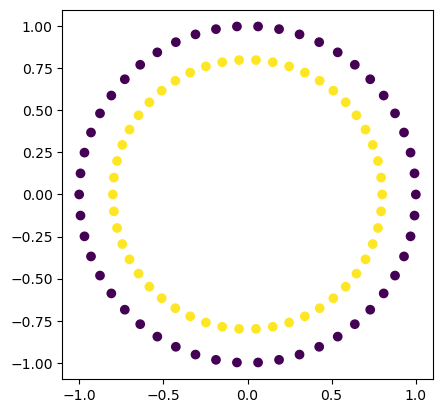

In [45]:
plt.scatter(circles_attrs[:, 0], circles_attrs[:, 1], c=circles_tgt)
plt.gca().set_aspect('equal')
plt.show()

In [55]:
# noise in data
circles_attrs, circles_tgt = make_circles(noise=0.08, factor=0.5, n_samples=200)

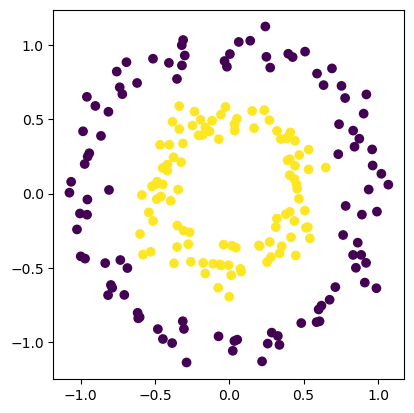

In [56]:
plt.scatter(circles_attrs[:, 0], circles_attrs[:, 1], c=circles_tgt)
plt.gca().set_aspect('equal')
plt.show()

In [57]:
circles_svm = LinearSVC()

In [58]:
circles_svm.fit(circles_attrs, circles_tgt)

LinearSVC()

In [59]:
circles_svm.score(circles_attrs, circles_tgt)

0.515

In [61]:
# the data is not linear so not good score
circle_poly_attrs = PolynomialFeatures(degree=2).fit_transform(circles_attrs)

In [62]:
circles_svm.fit(circle_poly_attrs, circles_tgt)

LinearSVC()

In [63]:
circles_svm.score(circle_poly_attrs, circles_tgt)

1.0

In [65]:
circles_svm_with_kernel = SVC(kernel='poly', degree=2)

In [66]:
circles_svm_with_kernel.fit(circles_attrs, circles_tgt)

SVC(degree=2, kernel='poly')

In [67]:
circles_svm_with_kernel.score(circles_attrs, circles_tgt)

1.0

In [73]:
jma = pd.read_csv('data/jma_td.csv')

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)

In [79]:
knn.fit(circles_attrs[:-50], circles_tgt[:-50])

KNeighborsClassifier()

In [80]:
knn.score(circles_attrs[-50:], circles_tgt[-50:])

1.0

In [81]:
pulsars = pd.read_csv('data/pulsar_stars.csv')

In [82]:
pulsars

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [84]:
pulsars.target_class.value_counts(normalize=True)

target_class
0    0.908426
1    0.091574
Name: proportion, dtype: float64

In [100]:
pulsar_attr_train, pulsar_attr_test, pulsar_tgt_train, pulsar_tgt_test = train_test_split(
    pulsars.drop(columns='target_class'),
    pulsars['target_class'],
    test_size = 0.25,
    stratify = pulsars['target_class']
)

In [101]:
svm = LinearSVC()

In [102]:
svm.fit(pulsar_attr_train, pulsar_tgt_train)

LinearSVC()

In [103]:
svm.score(pulsar_attr_test, pulsar_tgt_test)

0.9785474860335196

In [104]:
svm.score(pulsar_attr_train, pulsar_tgt_train)

0.9781717946807718

In [106]:
detector = OneClassSVM()

In [107]:
detector.fit(pulsar_attr_train)

OneClassSVM()

In [110]:
detector.predict(pulsar_attr_train)

array([ 1, -1, -1, ..., -1,  1, -1], dtype=int64)